# 1. Data wrangling<a id='2_Data_wrangling'></a>

# 1.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 1.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this Project is understand NYC 311 Complaints Call data and draw recommendation to improve customer satisfaction by addressing how long a 311 complaint will take to be resolved based on complaint type, agency, location, and time features.

## 1.3 Imports<a id='1.3_Imports'></a>

Placing imports all together at the start of notebook means we only need to consult one place to check your notebook's dependencies.

In [23]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sodapy import Socrata
#Sodapy is a Python client for the Socrata Open Data API, which allows users to easily access and interact with datasets hosted on Socrata-powered open data portals.

## 1.4 Objectives<a id='1.4_Objectives'></a>

Based on NYC 311 Complaint Data from 2023 onwards, analyze major attributes that contribute to citizen dissatisfaction with how their complaints are handled. 

Goal:
Identify major agency(s) , Boroughs and category of complaints that were had the longest resolution time.

Business Value:
- Improve citizen ETA estimates
- Identify slow agencies / bottlenecks
- Support staffing and performance management


## 1.5 Load NYC 311 Complaint Data Resort Data<a id='1.5_Load_NYC_311_Complaint_Data'></a>

In [ ]:
#API Pull
#pull complaint data from NYC Open Data using Socrata API from 2023 onwards
client = Socrata("data.cityofnewyork.us", None)
results = client.get("fhrw-4uyv", where="status = 'Closed' AND created_date >= '2023-01-01T00:00:00'", limit=1000000)
#Convert to DataFrame
df = pd.DataFrame.from_records(results) 

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [ ]:
#Code task 2#
#Call the info method on dataframe to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 44 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   unique_key                      1000000 non-null  object
 1   created_date                    1000000 non-null  object
 2   closed_date                     999864 non-null   object
 3   agency                          1000000 non-null  object
 4   agency_name                     1000000 non-null  object
 5   complaint_type                  1000000 non-null  object
 6   descriptor                      992145 non-null   object
 7   location_type                   872899 non-null   object
 8   incident_zip                    990691 non-null   object
 9   incident_address                957978 non-null   object
 10  street_name                     957964 non-null   object
 11  cross_street_1                  676867 non-null   object
 12  cross_street_2 

In [ ]:
#Code task 3#
#Call the head method on df to print the first several rows of the data
df.head()
#Display first few rows of the DataFrame
print(df.head())

  unique_key             created_date              closed_date agency  \
0   58732438  2023-09-06T04:40:26.000  2023-09-06T06:15:07.000   NYPD   
1   58740813  2023-09-07T20:00:02.000  2023-09-07T22:02:18.000   NYPD   
2   58732467  2023-09-06T16:15:50.000  2023-09-06T17:22:06.000   NYPD   
3   58740230  2023-09-07T11:50:18.000  2023-09-07T19:55:48.000   NYPD   
4   58735843  2023-09-06T13:33:25.000  2023-09-15T10:59:28.000   DSNY   

                       agency_name     complaint_type  \
0  New York City Police Department   Blocked Driveway   
1  New York City Police Department  Abandoned Vehicle   
2  New York City Police Department   Blocked Driveway   
3  New York City Police Department    Illegal Parking   
4         Department of Sanitation    Illegal Dumping   

                      descriptor    location_type incident_zip  \
0                      No Access  Street/Sidewalk        11357   
1             With License Plate  Street/Sidewalk        11229   
2                 Pa

## 1.6 Explore The Data<a id='1.6_Explore_The_Data'></a>

### 1.6.1 Find Various metrics and attributes of Complaint Types and Agencies associated with it<a id='1.6.1_Find_Your_Complaint Type and Agency Associated'></a>

Complaint with the longest resolution time:
unique_key                                                                 56475064
created_date                                                    2023-01-08 14:17:22
closed_date                                                     2025-11-25 09:47:33
agency                                                                          DPR
agency_name                                      Department of Parks and Recreation
complaint_type                                                  Wood Pile Remaining
descriptor                                                            Remove Debris
location_type                                                                Street
incident_zip                                                                  11238
incident_address                                                743 FRANKLIN AVENUE
street_name                                                         FRANKLIN AVENUE
cross_street_1                  

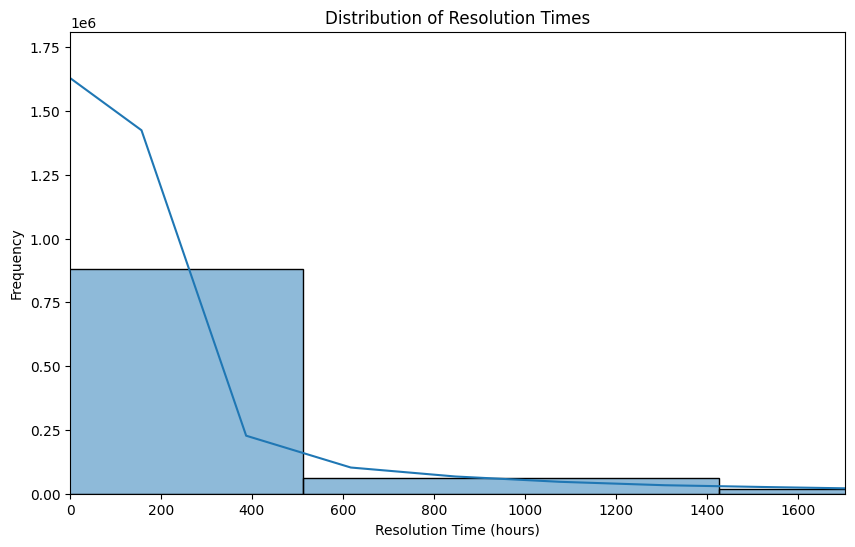

Agency with most complaints: NYPD (418945 complaints)


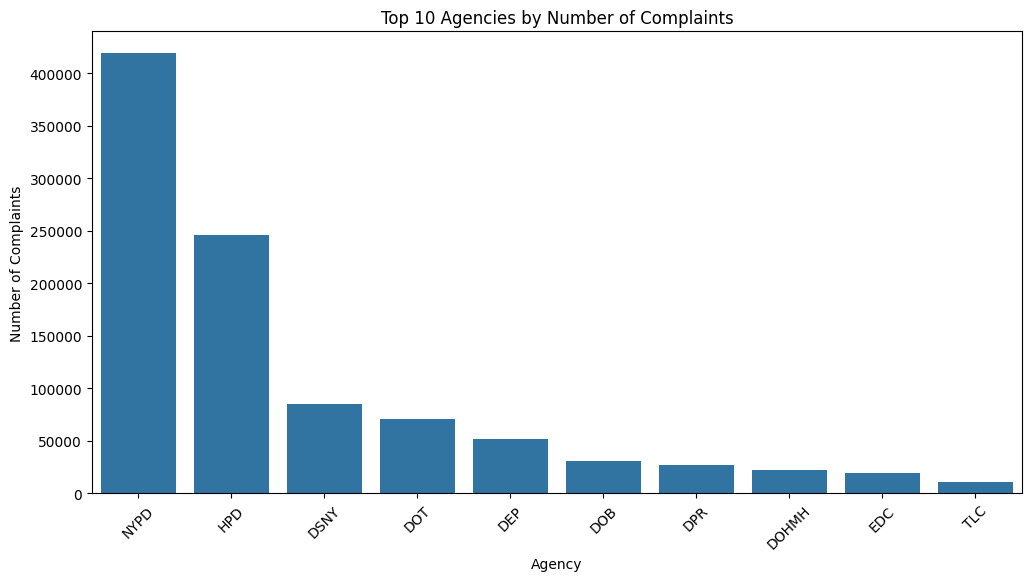

In [ ]:
#Filter for complaints that have longest resolution time
#Convert date columns to datetime to ensure both columns are in datetime format
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
#Calculate resolution time in hours
df['resolution_time'] = (df['closed_date'] - df['created_date']).dt.total_seconds() / 3600  # Convert to hours
#Find the complaint with the longest resolution time and the agency responsible
longest_resolution = df.loc[df['resolution_time'].idxmax()]
print("Complaint with the longest resolution time:")
print(longest_resolution)   
print(f"Agency associated with this complaint: {longest_resolution['agency']}")


#Calculate the average resolution time for all complaints
df[['created_date', 'closed_date', 'resolution_time']].head()
avg_resolution_time = df['resolution_time'].mean()
print(f"Average resolution time (in hours): {avg_resolution_time}")


#Visualize the distribution of resolution times using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['resolution_time'].dropna(), bins=50, kde=True)
plt.title('Distribution of Resolution Times')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Frequency')
plt.xlim(0, df['resolution_time'].quantile(0.95))  # Limit x-axis to 95th percentile for better visualization
plt.show()  


#Identify the agency with the most complaints
agency_complaint_counts = df['agency'].value_counts()   
most_complaints_agency = agency_complaint_counts.idxmax()
most_complaints_count = agency_complaint_counts.max()
print(f"Agency with most complaints: {most_complaints_agency} ({most_complaints_count} complaints)")    


#Visualize the top 10 agencies by number of complaints using a bar chart
top_10_agencies = agency_complaint_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_agencies.index, y=top_10_agencies.values)
plt.title('Top 10 Agencies by Number of Complaints')
plt.xlabel('Agency')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()  


Agency with most complaints: NYPD with 359948 complaints


C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\1077981365.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_complaint_counts.index, y=agency_complaint_counts.values, palette="viridis")


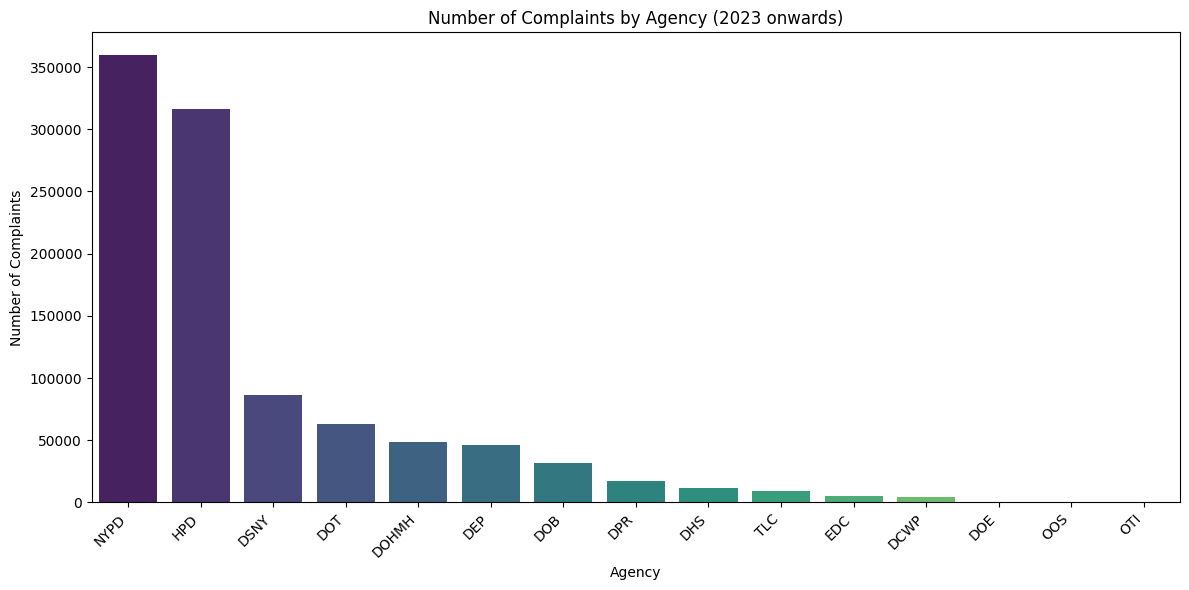

In [ ]:
##Agency with most complaints ; Group by agency and count complaints
agency_complaint_counts = df['agency'].value_counts()   
most_complaints_agency = agency_complaint_counts.idxmax()
most_complaints_count = agency_complaint_counts.max()
print(f"Agency with most complaints: {most_complaints_agency} with {most_complaints_count} complaints")

#Create a bar plot showing the number of complaints by agency
plt.figure(figsize=(12, 6))
sns.barplot(x=agency_complaint_counts.index, y=agency_complaint_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Number of Complaints by Agency (2023 onwards)')
plt.xlabel('Agency')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()


Preliminary Analysis indicates that :

1. Complaint with the longest resolution time : 56475064 Hrs
The case was created on - 2023-01-08 14:17:22
Closed on - 2025-11-25 09:47:33
Associate agency - DPR , Department of Parks and Recreation
Complaint Type - Wood Pile Remaining

2. It definitely looks like Agency - DPR could be one of the Agency that is contributing to Citizen dissatisfaction with NYC services.

3. It was also noted that Average resolution time (in hours): 477.36788126851917 for Agency : DPR

4. It was also noted that Agency with most complaints is  NYPD with 418945 complaints in the data set. 

5. Based on Distribution of Resolution Times chart, which did not include any missing values and which removed extreme outliers for visual purposes (by limiting X-axis from 0-->95th percentile value), we can understand from the histogram 
Most service requests are resolved within the first few days, but a small subset experiences significantly longer resolution times, indicating opportunities to improve handling of complex or escalated cases.

6. Majority of complaints are resolved roughly within: 0 – 200 hours - (≈ 0 – 8 days). This suggests:
Operational processes work efficiently for most cases
Standard requests are handled quickly

7. There are complaints stretching to: 1600+ hours (~67 days). This means:
Some cases are complex
Some maybe stuck / escalated
Possible backlog or inter-agency dependency

8. Areas that need attention are : 
Medium duration cases (200–500 hours)
Could be process inefficiencies

Based on these results, we plan to focus on the agencies with the longest resolution times across different complaint types and boroughs reporting those complaints. We will also prioritize agencies handling the highest complaint volumes and their associated complaint categories, as improvements in these areas are likely to drive significant overall performance gains in NYC 311 Customer complaint resolution.


### 1.6.2 Missing values in Complaint Data and its impact on Resolution time<a id='1.6.2_Missing_Values & Resolution Times'></a>

Goal is to understand if missing data in Complaint Data set has any role on Resolution time i.e if Customer complaint was not addressed satiasfactorily because there was missing data when the complaint was captured. The next series of steps are to arrive at a conclusion if missing data in the customer complaint impacted providing resolutions.

In [26]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#Complaint data s well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count',ascending=False)

,count,%
vehicle_type,999664,99.9664
taxi_company_borough,999480,99.9480
road_ramp,997922,99.7922
due_date,997675,99.7675
bridge_highway_direction,997092,99.7092
bridge_highway_name,994516,99.4516
bridge_highway_segment,994515,99.4515
taxi_pick_up_location,989689,98.9689
facility_type,927326,92.7326
descriptor_2,510633,51.0633


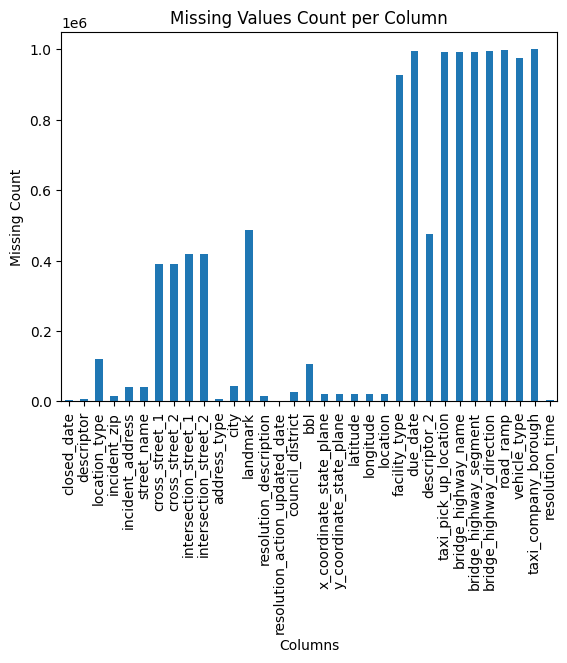

                                 count  percent
taxi_company_borough            999624  99.9624
road_ramp                       996934  99.6934
bridge_highway_direction        995585  99.5585
due_date                        993981  99.3981
bridge_highway_segment          991427  99.1427
bridge_highway_name             991427  99.1427
taxi_pick_up_location           991269  99.1269
vehicle_type                    974055  97.4055
facility_type                   925959  92.5959
landmark                        486975  48.6975
descriptor_2                    476241  47.6241
intersection_street_1           419643  41.9643
intersection_street_2           419224  41.9224
cross_street_1                  389592  38.9592
cross_street_2                  389424  38.9424
location_type                   119945  11.9945
bbl                             106822  10.6822
city                             44082   4.4082
street_name                      41738   4.1738
incident_address                 41702  

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\1869976454.py:21: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_agency = df.groupby('agency').apply(lambda x: x.isnull().sum())


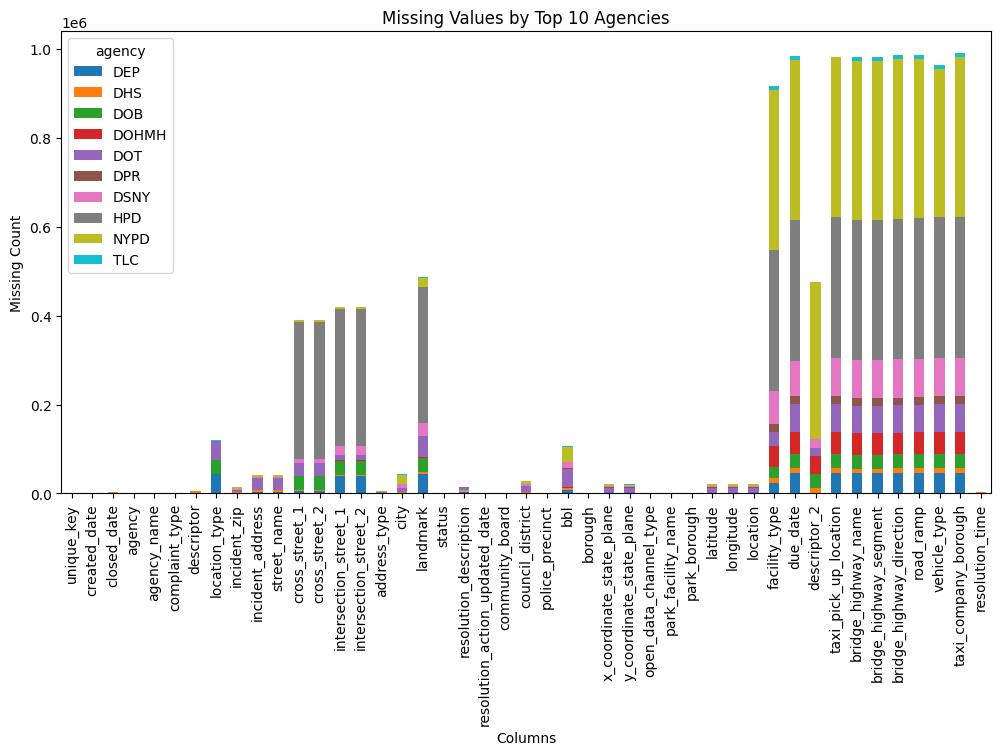

In [ ]:
#Visualize by plotting the missing values
missing = pd.concat(
    [df.isnull().sum(), 100 * df.isnull().mean()],
    axis=1
)
missing.columns = ['count', 'percent']

missing = missing[missing['count'] > 0]

missing['count'].plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=90)
plt.show()
print(missing.sort_values(by='count', ascending=False))


#Visualize missing values by agency for top 10 agencies

missing_by_agency = df.groupby('agency').apply(lambda x: x.isnull().sum())
plot_data = missing_by_agency[missing_by_agency.index.isin(top_10_agencies.index)]
plot_data.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Missing Values by Top 10 Agencies')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=90)
plt.show()  


Based on assessment of Missing values sorted by maximum count of missing data, we can understand that NYPD and HPD are top two agencies that have the most missing values in the data , the recommendation is these Agencies should accurately capture all relevant data when logging complaints.

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\3826199428.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_agency = df.groupby('agency').apply(lambda x: x.isnull().sum().sum())


Agency with most missing values: HPD


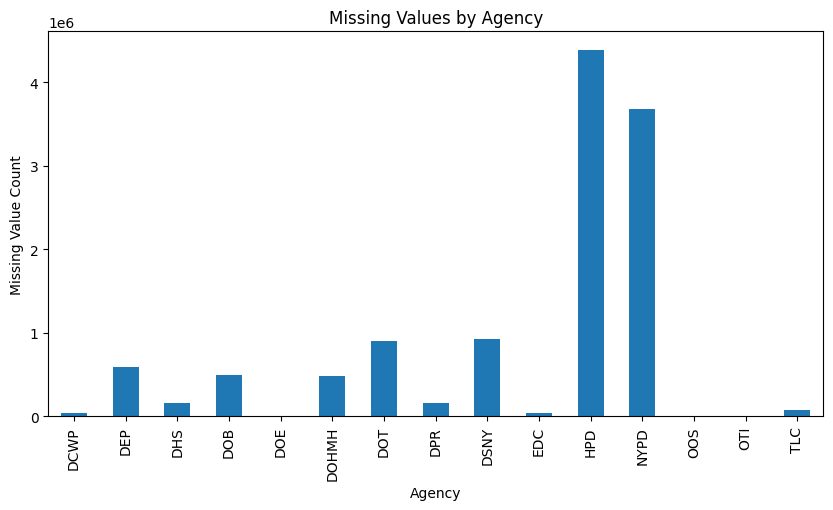

In [ ]:
#Agencies with most missing values
missing_values_by_agency = df.groupby('agency').apply(lambda x: x.isnull().sum().sum())
most_missing_agency = missing_values_by_agency.idxmax()
print(f"Agency with most missing values: {most_missing_agency}")
missing_values_by_agency.plot(kind='bar', figsize=(10, 5))
plt.title('Missing Values by Agency')
plt.xlabel('Agency')
plt.ylabel('Missing Value Count')
plt.show()

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\1479102504.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_agency = df.groupby('agency').apply(lambda x: x.isnull().sum().sum())


Correlation between missing values and average resolution time by agency: -0.3888517984169587


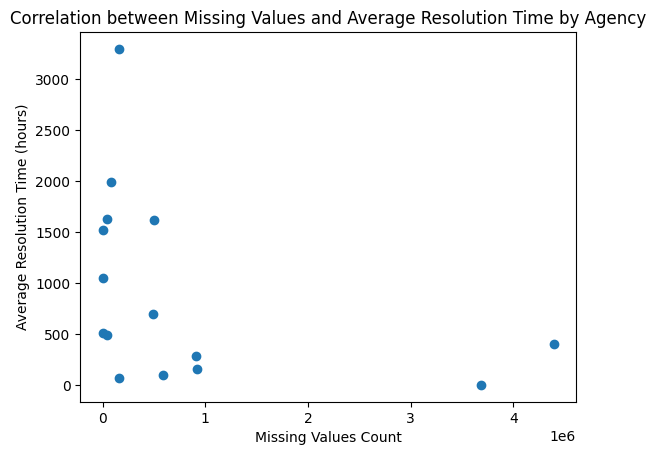

In [ ]:
#Agencies with most missing values, calculate correlation of missing values and resolution time
missing_values_by_agency = df.groupby('agency').apply(lambda x: x.isnull().sum().sum())
resolution_time_by_agency = df.groupby('agency')['resolution_time'].mean()
correlation = missing_values_by_agency.corr(resolution_time_by_agency)
print(f"Correlation between missing values and average resolution time by agency: {correlation}")
#plot the correlation
plt.scatter(missing_values_by_agency, resolution_time_by_agency)
plt.title('Correlation between Missing Values and Average Resolution Time by Agency')
plt.xlabel('Missing Values Count')
plt.ylabel('Average Resolution Time (hours)')
plt.show()


There is no strong linear correlation, therefore we can conclude that Missing data alone does not strongly predict resolution speed.Also Count is not being helpful to draw any strong conclusions, therefore let us see if % of missing values per Agency is any helpful in understanding correlation between missing values and resolution time.

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\439187654.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_by_agency = df.groupby('agency').apply(lambda x: x.isnull().mean().mean())


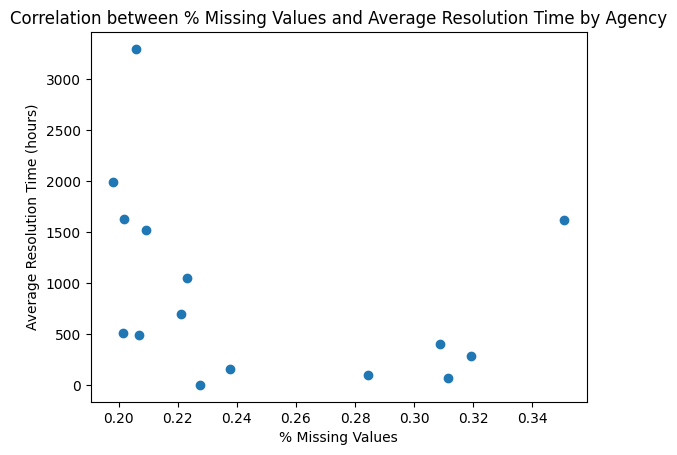

In [ ]:
#Find % missing values per agency with resolution time
missing_values_by_agency = df.groupby('agency').apply(lambda x: x.isnull().mean().mean())
resolution_time_by_agency = df.groupby('agency')['resolution_time'].mean()      
#plot the correlation
plt.scatter(missing_values_by_agency, resolution_time_by_agency)
plt.title('Correlation between % Missing Values and Average Resolution Time by Agency')     
plt.xlabel('% Missing Values')
plt.ylabel('Average Resolution Time (hours)')
plt.show()


In [ ]:
Conlusion on Missing Value analysis :

We can see that Agencies with:
I. 
~20% missing → resolution time ranges from ~0 → 6000 hours

~30–35% missing → resolution time ranges from ~50 → 1200 hours
Conclusion:
Higher missing data % does not consistently mean slower resolution.

II.
Right side (~28–35% missing): Most agencies here have:
Resolution time under ~500 hours
One moderate outlier (~1200 hours)
This suggests: Some agencies operate fast despite weaker data completeness
Data quality ≠ operational speed necessarily

III.
Most agencies appear around: Missing % → 20–24%
Resolution → 0–500 hours
This is likely is our baseline performance band

So therefore we can proceed with investigating Agencies with most longest resolution times and draw any correlation with Complaint Type. Missing data does not play a significant role in understanding its impact in resolution times.

### 1.6.3 Categorical Features<a id='1.6.3_Categorical_Features'></a>

So far we've examined only the numeric features. Now we will inspect categorical ones such as Agency, Agency Name, Complaint Type, Descriptor, Location Type, Status & Resolution (Status - Open, Closed,Pending, Resolution Description, Due Date), Geography (Borough, City, Zip Code), 

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\765471916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_longest_resolution.index, y=top_10_longest_resolution.values, palette="magma")


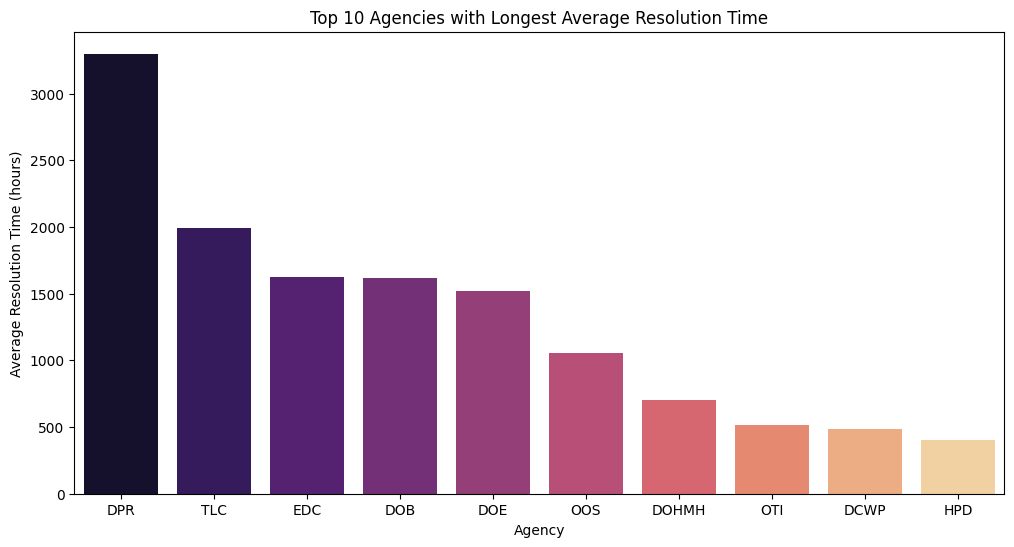

In [ ]:
#Top 10 agencies with longest average resolution time
avg_resolution_time_by_agency = df.groupby('agency')['resolution_time'].mean()
top_10_longest_resolution = avg_resolution_time_by_agency.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6)) 
sns.barplot(x=top_10_longest_resolution.index, y=top_10_longest_resolution.values, palette="magma")
plt.title('Top 10 Agencies with Longest Average Resolution Time')
plt.xlabel('Agency')
plt.ylabel('Average Resolution Time (hours)')   
plt.show()

Based on the above chart we can assess that DPR and TLC are two agencies with highest Average Resolution times. We will focus on various attributes of complaints for these two Agencies in the next few rows.

From this chart we can understand that for Agency : DPR, what are the top complaint types that citizens have reached out for. For NYC Mayor this may be an area where government can preemptively plan their operations before Citizens report the issues.

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\790262593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_resolution_time_dpr.index, y=avg_resolution_time_dpr.values, palette="Spectral")


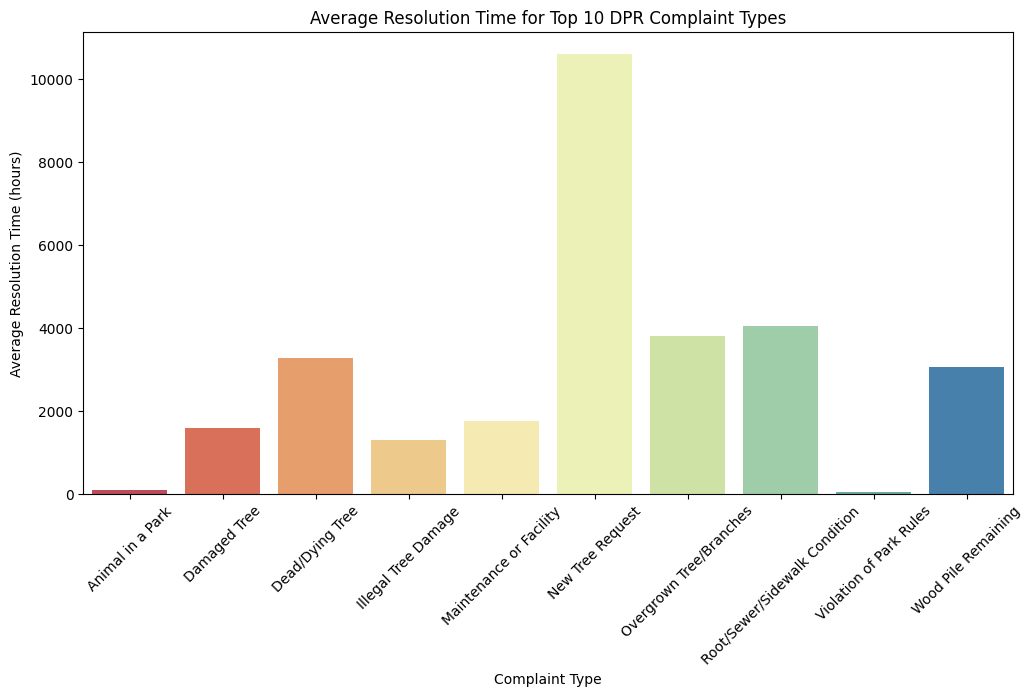

In [ ]:
#Average resolution time for top 10 complaint types for DPR
top_10_dpr_complaint_types = nypd_complaints['complaint_type'].value_counts().head(10).index
avg_resolution_time_dpr = nypd_complaints[nypd_complaints['complaint_type'].isin(top_10_dpr_complaint_types)].groupby('complaint_type')['resolution_time'].mean()
plt.figure(figsize=(12, 6)) 
sns.barplot(x=avg_resolution_time_dpr.index, y=avg_resolution_time_dpr.values, palette="Spectral")
plt.title('Average Resolution Time for Top 10 DPR Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Average Resolution Time (hours)')
plt.xticks(rotation=45) 
plt.show()


Borough with most DPR complaints: QUEENS with 6119 complaints


C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\190313752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_complaint_counts.index, y=borough_complaint_counts.values, palette="pastel")


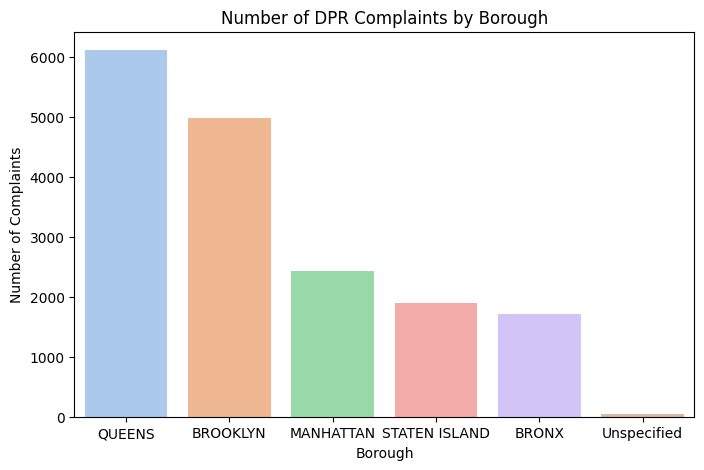

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\190313752.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_complaint_types.values, y=top_10_complaint_types.index, palette="Set2")


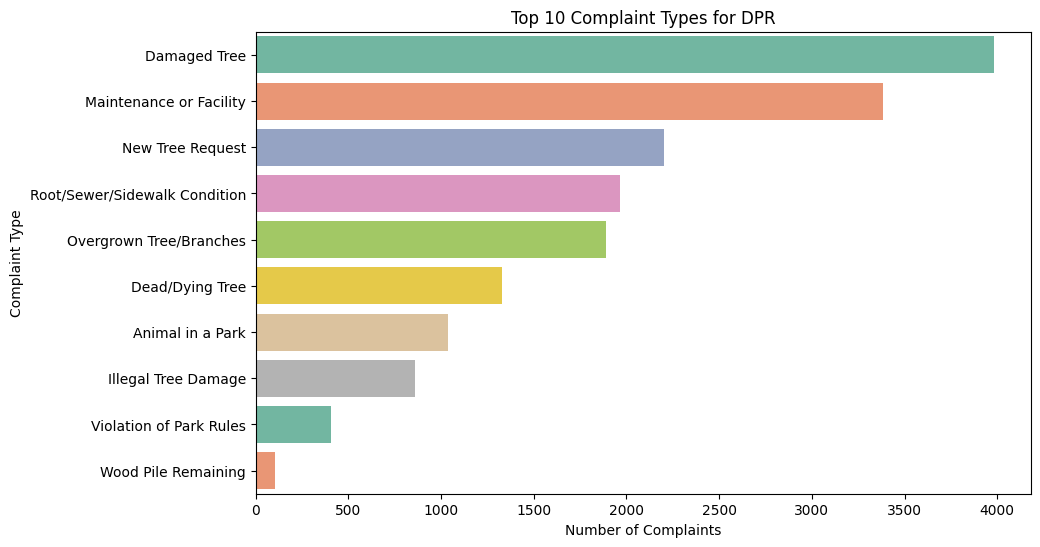

In [ ]:
#Boroughs with most complaints that DPR handled
dpr_complaints = df[df['agency'] == 'DPR']
borough_complaint_counts = dpr_complaints['borough'].value_counts()
most_complaints_borough = borough_complaint_counts.idxmax()
most_complaints_borough_count = borough_complaint_counts.max()
print(f"Borough with most DPR complaints: {most_complaints_borough} with {most_complaints_borough_count} complaints")
plt.figure(figsize=(8, 5))
sns.barplot(x=borough_complaint_counts.index, y=borough_complaint_counts.values, palette="pastel")
plt.title('Number of DPR Complaints by Borough')    
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.show()
plt.figure(figsize=(10, 6))
top_10_complaint_types = dpr_complaints['complaint_type'].value_counts().head(10)
sns.barplot(x=top_10_complaint_types.values, y=top_10_complaint_types.index, palette="Set2")
plt.title('Top 10 Complaint Types for DPR')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.show()  

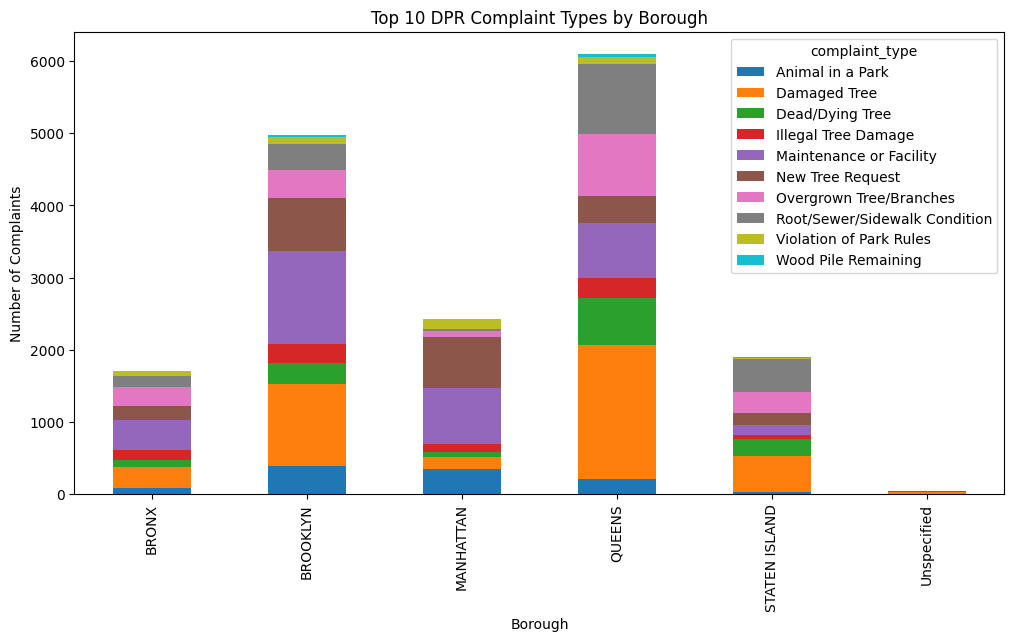

In [ ]:
#Top 10 complaint types for DPR by Borough
top_10_dpr_complaint_types = dpr_complaints['complaint_type'].value_counts().head(10).index
dpr_top_complaints_by_borough = dpr_complaints[dpr_complaints['complaint_type'].isin(top_10_dpr_complaint_types)].groupby(['borough', 'complaint_type']).size().unstack(fill_value=0)
dpr_top_complaints_by_borough.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 10 DPR Complaint Types by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.show()



Conclusion - DPR and TLC are two Agencies with longest resolution times.

For Agency  DPR: 
- DPR - The top complaint types were identified. The top one being complaints about Damaged Tree. The Mayor's team can preemptively work on addressing these issues before a citizen reaches out, there by decreasing the call volume for operators
- Also the Average resolution type for top 10 complaints for DPR indicates that on an average it took less than 4000 hours to resolve the complaint and with highest time taken for addressing Complaint type requesting for 'New Tree'
- It was also noted that "Queens" and "Brooklyn" were Boroughs where most of the complaints were received for Agency : DPR.
- Slicing it further we noted the top 10 complaints for DPR by Borough. Within the top 10 Complaints, it was observed that Boroughs - Brooklyn and Queens reported on the following complaint type  : Damaged Trees, Overgrown Tree/Branches, Maintenance or Facility, and Root/Sewer/Sidewalk conditions.

So any preemptive addressing of these issues will help citizens.


C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\2267069319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_tlc_complaint_types.index, y=top_10_tlc_complaint_types.values, palette="Spectral")


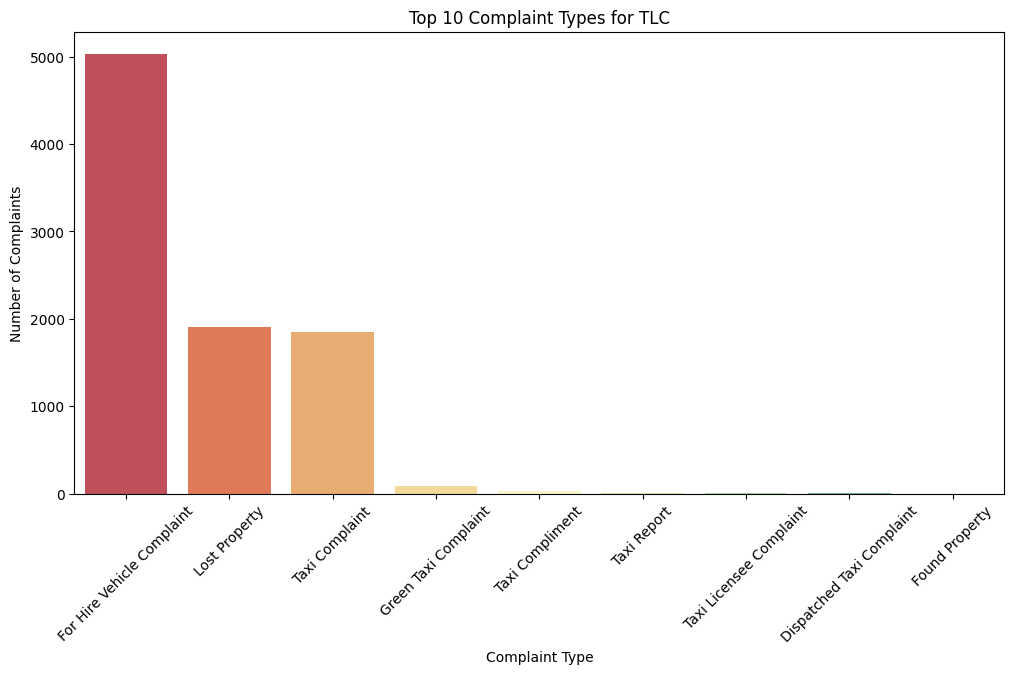

In [ ]:
#top 10 complaint types for TLC  
tlc_complaints = df[df['agency'] == 'TLC']
top_10_tlc_complaint_types = tlc_complaints['complaint_type'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_tlc_complaint_types.index, y=top_10_tlc_complaint_types.values, palette="Spectral")
plt.title('Top 10 Complaint Types for TLC')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()


C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\3870015462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_resolution_time_tlc.index, y=avg_resolution_time_tlc.values, palette="Spectral")


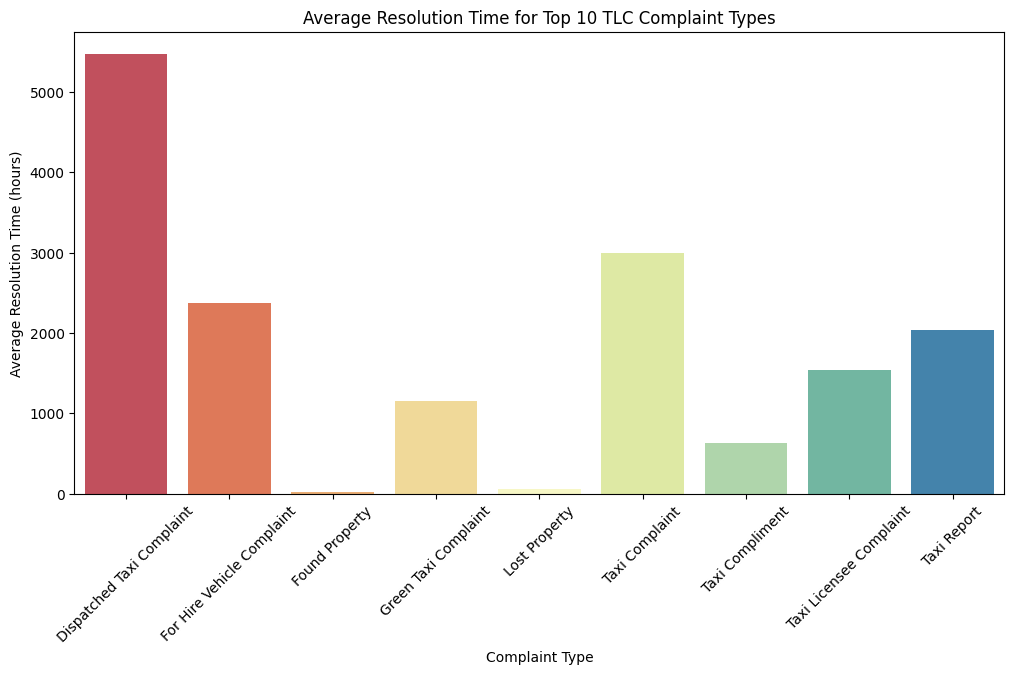

In [ ]:
#Average resolution time for top 10 complaint types for TLC
top_10_tlc_complaint_types = tlc_complaints['complaint_type'].value_counts().head(10).index
avg_resolution_time_tlc = tlc_complaints[tlc_complaints['complaint_type'].isin(top_10_tlc_complaint_types)].groupby('complaint_type')['resolution_time'].mean()
plt.figure(figsize=(12, 6)) 
sns.barplot(x=avg_resolution_time_tlc.index, y=avg_resolution_time_tlc.values, palette="Spectral")
plt.title('Average Resolution Time for Top 10 TLC Complaint Types')
plt.xlabel('Complaint Type')
plt.ylabel('Average Resolution Time (hours)')
plt.xticks(rotation=45)
plt.show()

We can conclude for Agency TLC:
- The top 10 complaints for TLC were noted and it was found that - For Hire Vehicle Complaint, and Lost Property were the major complaint categories.
- The Average resolution time for top 10 complaints were noted as well. It appears over 5000 hrs was the avg time it took to resolve complaints related to Dispatched Taxi complaints and about 2500 hrs for For Hire Vehicle Complaints.


#Explore further to identify which Agency has the most volume of Complaints and the type of complaints and their resolution time

In [ ]:
#Agency with most complaints ; Group by agency and count complaints and Average resolution time in hours
agency_complaint_counts = df['agency'].value_counts()   
most_complaints_agency = agency_complaint_counts.idxmax()
most_complaints_count = agency_complaint_counts.max()
print(f"Agency with most complaints: {most_complaints_agency} with {most_complaints_count} complaints")
avg_resolution_time = df['resolution_time'].mean()
print(f"Average resolution time in hours: {avg_resolution_time}")
converted_avg_resolution_time = round(avg_resolution_time, 2)
print(f"Average resolution time in hours (rounded): {converted_avg_resolution_time}")
print(f"Average resolution time in days (rounded): {converted_avg_resolution_time / 24}")


Agency with most complaints: NYPD with 359948 complaints
Average resolution time in hours: 337.00348704777923
Average resolution time in hours (rounded): 337.0
Average resolution time in days (rounded): 14.041666666666666


In [ ]:
#Borough with most complaints that NYPD handled
nypd_complaints = df[df['agency'] == 'NYPD']
borough_complaint_counts = nypd_complaints['borough'].value_counts()
most_complaints_borough = borough_complaint_counts.idxmax()
most_complaints_borough_count = borough_complaint_counts.max()
print(f"Borough with most NYPD complaints: {most_complaints_borough} with {most_complaints_borough_count} complaints")


Borough with most NYPD complaints: BROOKLYN with 119576 complaints


Borough with most NYPD complaints: BROOKLYN with 119576 complaints
Top 10 complaint types in that borough:
complaint_type
Illegal Parking                56920
Noise - Residential            23063
Blocked Driveway               18939
Abandoned Vehicle               5147
Noise - Commercial              4295
Noise - Street/Sidewalk         3972
Noise - Vehicle                 2175
Non-Emergency Police Matter     1215
Encampment                      1182
Animal-Abuse                     789
Name: count, dtype: int64


C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_22092\1730657723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_complaint_types_borough.index, y=top_10_complaint_types_borough.values, palette="Blues")


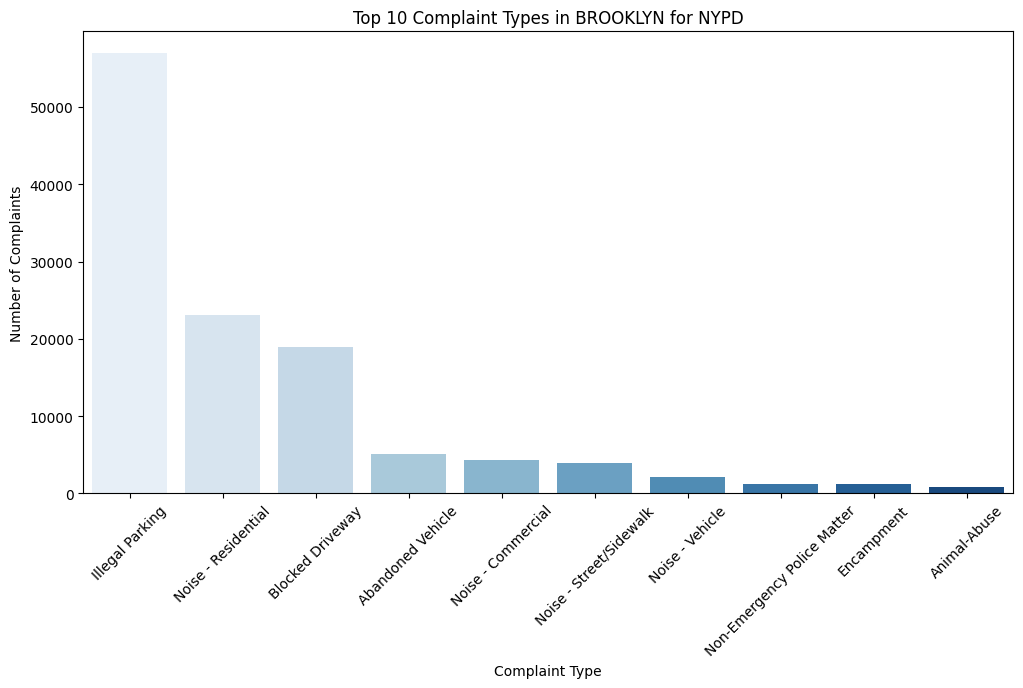

In [ ]:
#NYPD Borough with most complaints and the top 10 complaint types in that borough
nypd_complaints = df[df['agency'] == 'NYPD']
borough_complaint_counts = nypd_complaints['borough'].value_counts()
most_complaints_borough = borough_complaint_counts.idxmax()
most_complaints_borough_count = borough_complaint_counts.max()
print(f"Borough with most NYPD complaints: {most_complaints_borough} with {most_complaints_borough_count} complaints")
top_10_complaint_types_borough = nypd_complaints[nypd_complaints['borough'] == most_complaints_borough]['complaint_type'].value_counts().head(10)
print("Top 10 complaint types in that borough:")
print(top_10_complaint_types_borough)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_complaint_types_borough.index, y=top_10_complaint_types_borough.values, palette="Blues")
plt.title(f'Top 10 Complaint Types in {most_complaints_borough} for NYPD')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45) 
plt.show()


We can conclude that Agency with most complaints is : NYPD with 359948 complaints
- Average resolution time in hours: 337.00348704777923
- Average resolution time in hours (rounded): 337.0
- Average resolution time in days (rounded): 14.041666666666666

- Borough with most NYPD complaints: BROOKLYN with 119576 complaints. The top 10 complaint categories were noted and it is worth noting that 
topping the list are complaint type :
- Illegal Parking received 56920 complaints
- Noise - Residential received 23063 complaints
- Blocked Driveway received 18939 complaints


## 1.7 Review distributions<a id='1.7_Review_distributions'></a>

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\837892064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_complaint_types.values, y=top_10_complaint_types.index, palette="Set2")
C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\837892064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_complaint_types.values, y=top_10_complaint_types.index, palette="Set2")
C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\837892064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_complaint_types.val

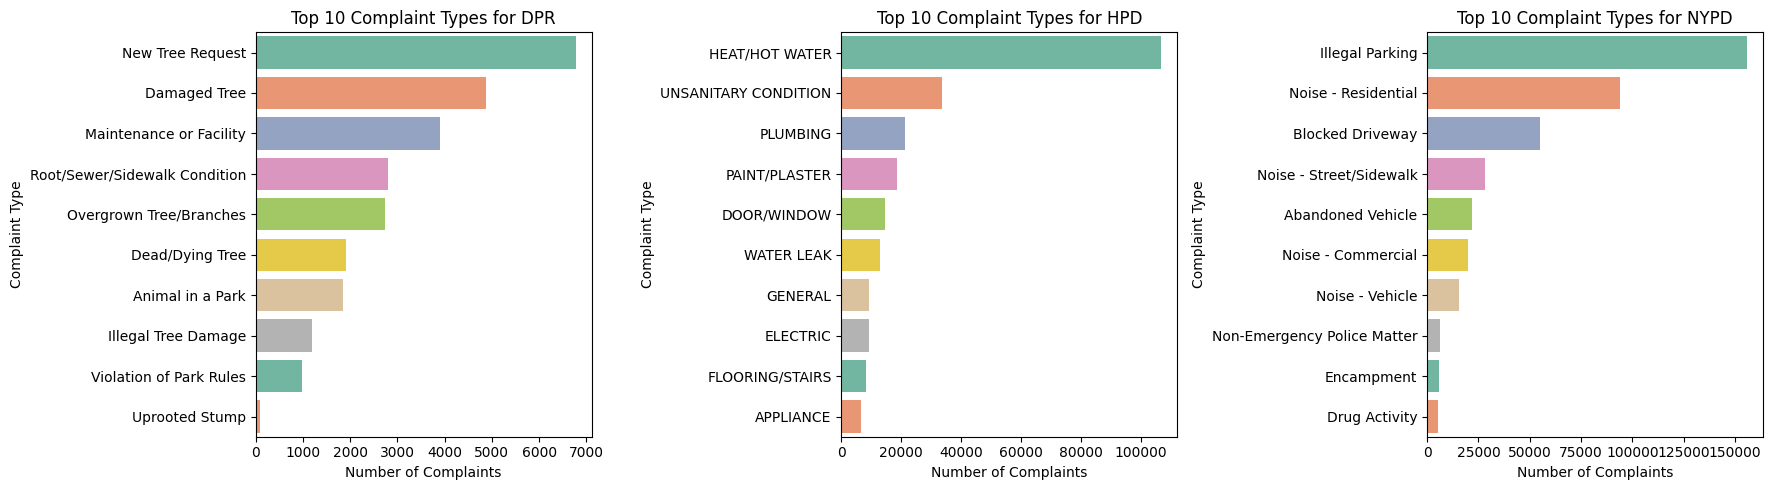

In [ ]:
#subplot DPR, HPD and NYPD complaints types histograms
agencies = ['DPR', 'HPD', 'NYPD']
plt.figure(figsize=(18, 5))
for i, agency in enumerate(agencies, 1):
    plt.subplot(1, 3, i)
    agency_complaints = df[df['agency'] == agency]
    top_10_complaint_types = agency_complaints['complaint_type'].value_counts().head(10)
    sns.barplot(x=top_10_complaint_types.values, y=top_10_complaint_types.index, palette="Set2")
    plt.title(f'Top 10 Complaint Types for {agency}')
    plt.xlabel('Number of Complaints')
    plt.ylabel('Complaint Type')
plt.tight_layout()
plt.show()



C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\1905494033.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_complaint_counts.index, y=borough_complaint_counts.values, palette="pastel")
C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\1905494033.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_complaint_counts.index, y=borough_complaint_counts.values, palette="pastel")
C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\1905494033.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_com

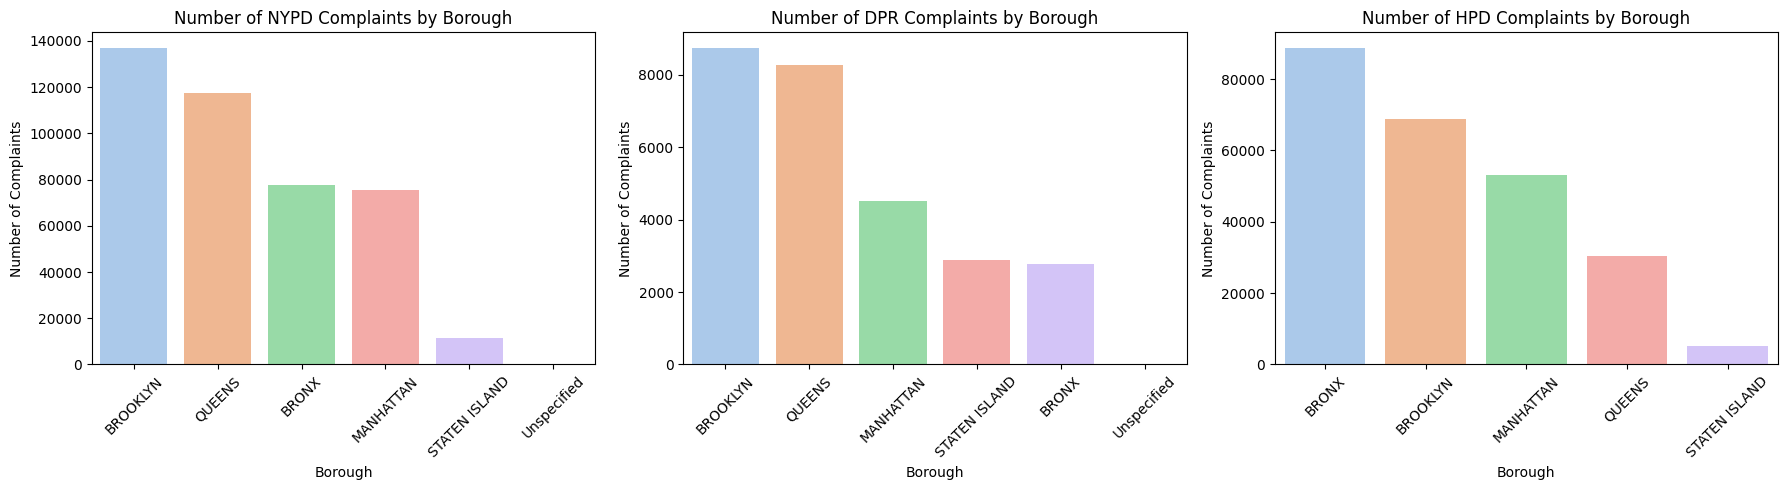

In [ ]:
#subplot top 10 boroughs with most complaints for NYPD, DPR, and HPD
agencies = ['NYPD', 'DPR', 'HPD']
plt.figure(figsize=(18, 5))
for i, agency in enumerate(agencies, 1):
    plt.subplot(1, 3, i)
    agency_complaints = df[df['agency'] == agency]
    borough_complaint_counts = agency_complaints['borough'].value_counts().head(10)
    sns.barplot(x=borough_complaint_counts.index, y=borough_complaint_counts.values, palette="pastel")
    plt.title(f'Number of {agency} Complaints by Borough')
    plt.xlabel('Borough')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\3118471051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_resolution_time.index, y=avg_resolution_time.values, palette="Spectral")
C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\3118471051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_resolution_time.index, y=avg_resolution_time.values, palette="Spectral")
C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\3118471051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_resolution_time.inde

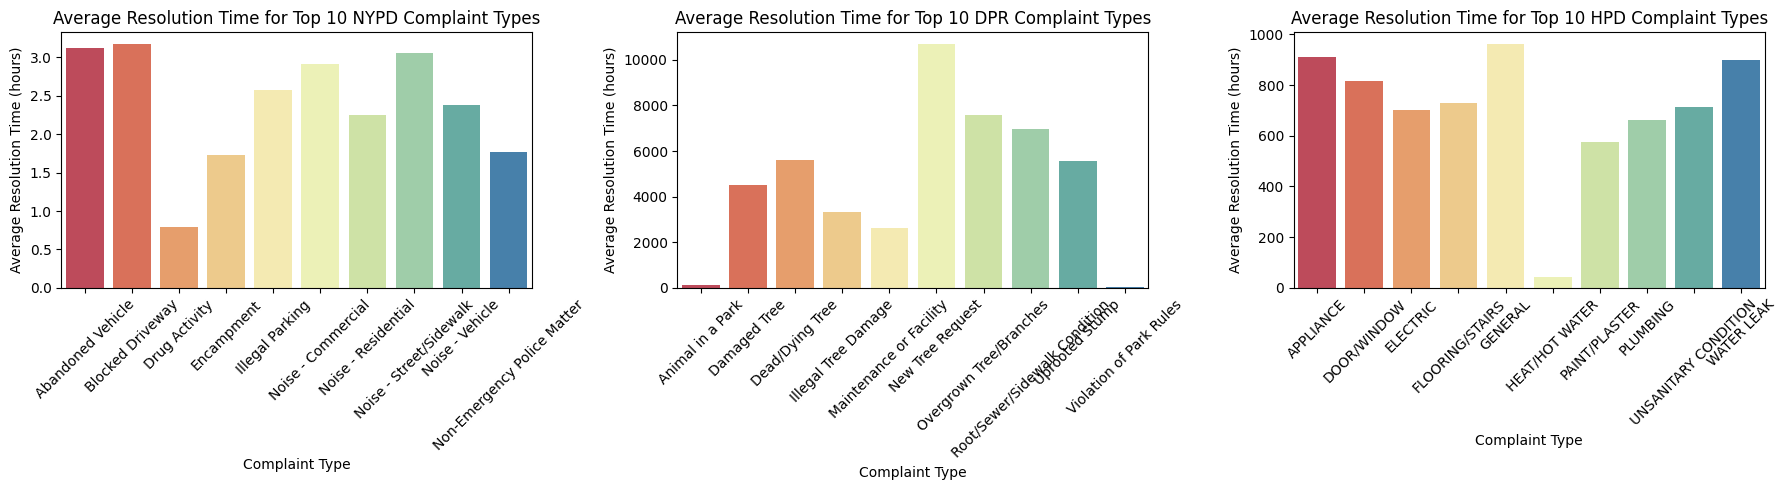

In [ ]:
# subplot average resolution time for top 10 complaint types for NYPD, DPR, and HPD for the enitre data set from 2023 onwards
agencies = ['NYPD', 'DPR', 'HPD']
plt.figure(figsize=(18, 5))
for i, agency in enumerate(agencies, 1):
    plt.subplot(1, 3, i)
    agency_complaints = df[df['agency'] == agency]
    agency_complaints = agency_complaints[agency_complaints['created_date'] >= '2023-01-01']
    top_10_complaint_types = agency_complaints['complaint_type'].value_counts().head(10).index
    avg_resolution_time = agency_complaints[agency_complaints['complaint_type'].isin(top_10_complaint_types)].groupby('complaint_type')['resolution_time'].mean()
    sns.barplot(x=avg_resolution_time.index, y=avg_resolution_time.values, palette="Spectral")
    plt.title(f'Average Resolution Time for Top 10 {agency} Complaint Types')
    plt.xlabel('Complaint Type')
    plt.ylabel('Average Resolution Time (hours)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  


Based on the data wrangling we reached the conclusion that: for data set of Complaints from 2023 onwards that were resolved:  
- DPR and TLC were the agencies with highest resolution time for the complaints they received. We noted tope 10 complaint categories for these agencies and the Boroughs that placed these complaints
- NYPD is another agency that received most number of complaints and we noted the Boroughs that placed these complaints
Our goal next goal is identify our target features for these complaints that will help us address the use case.

## 1.8 Target Feature<a id='1.8_Target_Feature'></a>

Finally, we will target Boroughs with highest complaints for these Agencies. The boroughs noted in the chart above will be our target to recommend improvements so that NYC Citizens have less number of complaints to place.

## Summary<a id='Summary'></a>

C:\Users\VBACOMishrR\AppData\Local\Temp\1\ipykernel_9080\3282322220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_complaint_counts.index, y=agency_complaint_counts.values, palette="viridis")


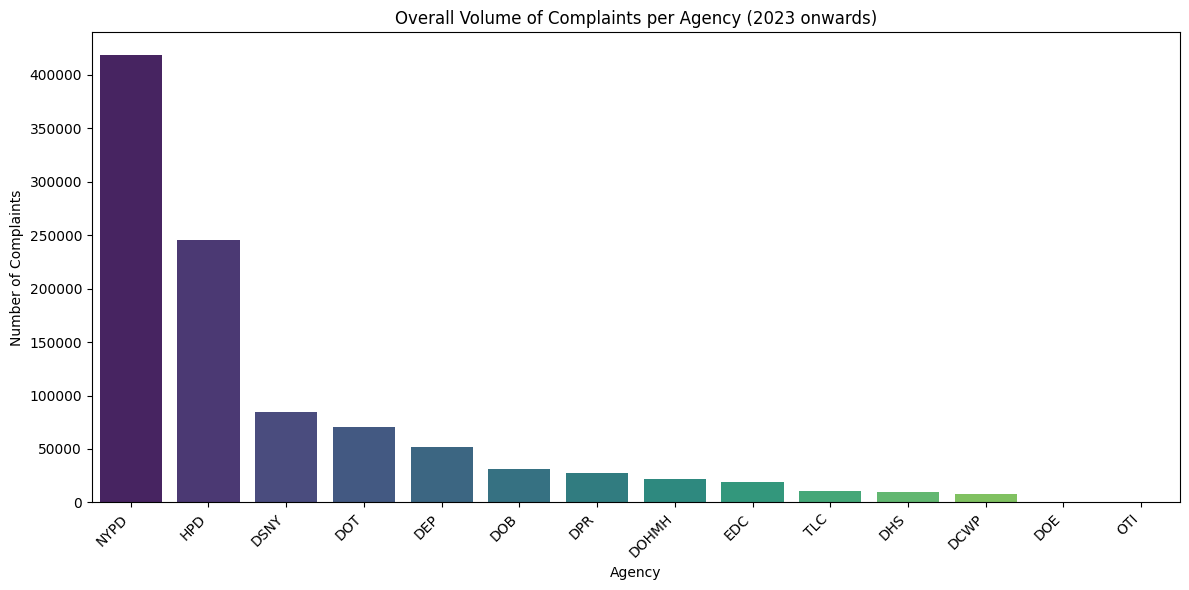

In [ ]:
#plot overall volume of complaints per agency for the entire data set from 2023 onwards
agency_complaint_counts = df['agency'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=agency_complaint_counts.index, y=agency_complaint_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right') 
plt.title('Overall Volume of Complaints per Agency (2023 onwards)')
plt.xlabel('Agency')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()


In [ ]:
#Total number of rows and columns in the dataset
df.shape

(1000000, 45)

#Summary

Overall 1,000,000 rows of complaints with 41 features were assessed to arrive at conclusion and define scope for recommendations that will yield positive results in NYC Citizen's experience with the city. 

Based on Distribution of Resolution Times chart, which did not include any missing values and which removed extreme outliers for visual purposes (by limiting X-axis from 0-->95th percentile value), we can understand from the histogram 
Most service requests are resolved within the first few days, but a small subset experiences significantly longer resolution times, indicating opportunities to improve handling of complex or escalated cases.

Majority of complaints are resolved roughly within: 0 – 200 hours - (≈ 0 – 8 days). This suggests:
Operational processes work efficiently for most cases
Standard requests are handled quickly

There are complaints stretching to: 1600+ hours (~67 days). This means:
Some cases are complex
Some maybe stuck / escalated
Possible backlog or inter-agency dependency

Areas that need attention are : 
Medium duration cases (200–500 hours)
Could be process inefficiencies

Based on these results, we plan to focus on the agencies with the longest resolution times across different complaint types and boroughs reporting those complaints. We will also prioritize agencies handling the highest complaint volumes and their associated complaint categories, as improvements in these areas are likely to drive significant overall performance gains in NYC 311 Customer complaint resolution.

Two Agencies 
DPR and TLC are two Agencies with longest resolution times.
For Agency  DPR: 
DPR - The top complaint types were identified. The top one being complaints about Damaged Tree. The Mayor's team can preemptively work on addressing these issues before a citizen reaches out, there by decreasing the call volume for operators
Also the Average resolution type for top 10 complaints for DPR indicates that on an average it took less than 4000 hours to resolve the complaint and with highest time taken for addressing Complaint type requesting for 'New Tree'
It was also noted that "Queens" and "Brooklyn" were Boroughs where most of the complaints were received for Agency : DPR.
Slicing it further we noted the top 10 complaints for DPR by Borough. Within the top 10 Complaints, it was observed that Boroughs - Brooklyn and Queens reported on the following complaint type  : Damaged Trees, Overgrown Tree/Branches, Maintenance or Facility, and Root/Sewer/Sidewalk conditions.

So any preemptive addressing of these issues will help citizens.

For Agency TLC:
The top 10 complaints for TLC were noted and it was found that - For Hire Vehicle Complaint, and Lost Property were the major complaint categories.
The Average resolution time for top 10 complaints were noted as well. It appears over 5000 hrs was the avg time it took to resolve complaints related to Dispatched Taxi complaints and about 2500 hrs for For Hire Vehicle Complaints.

Agency with most complaints: NYPD with 359948 complaints
Average resolution time in hours: 337.00348704777923
Average resolution time in hours (rounded): 337.0
Average resolution time in days (rounded): 14.041666666666666

Borough with most NYPD complaints: BROOKLYN with 119576 complaints. The top 10 complaint categories were noted and it is worth noting that 
topping the list are complaint type :
Illegal Parking received 56920 complaints
Noise - Residential received 23063 complaints
Blocked Driveway received 18939 complaints